### Ejemplo CRISP-DM: Clasificación con Iris y múltiples algoritmos

1. Bussiness Understanding

Objetivo:
Clasificar flores de Iris en sus tres especies (Setosa, Versicolor, Virginica)
usando diferentes algoritmos de clasificación y comparar su rendimiento.


2. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# Cargar dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


<Figure size 100x100 with 0 Axes>

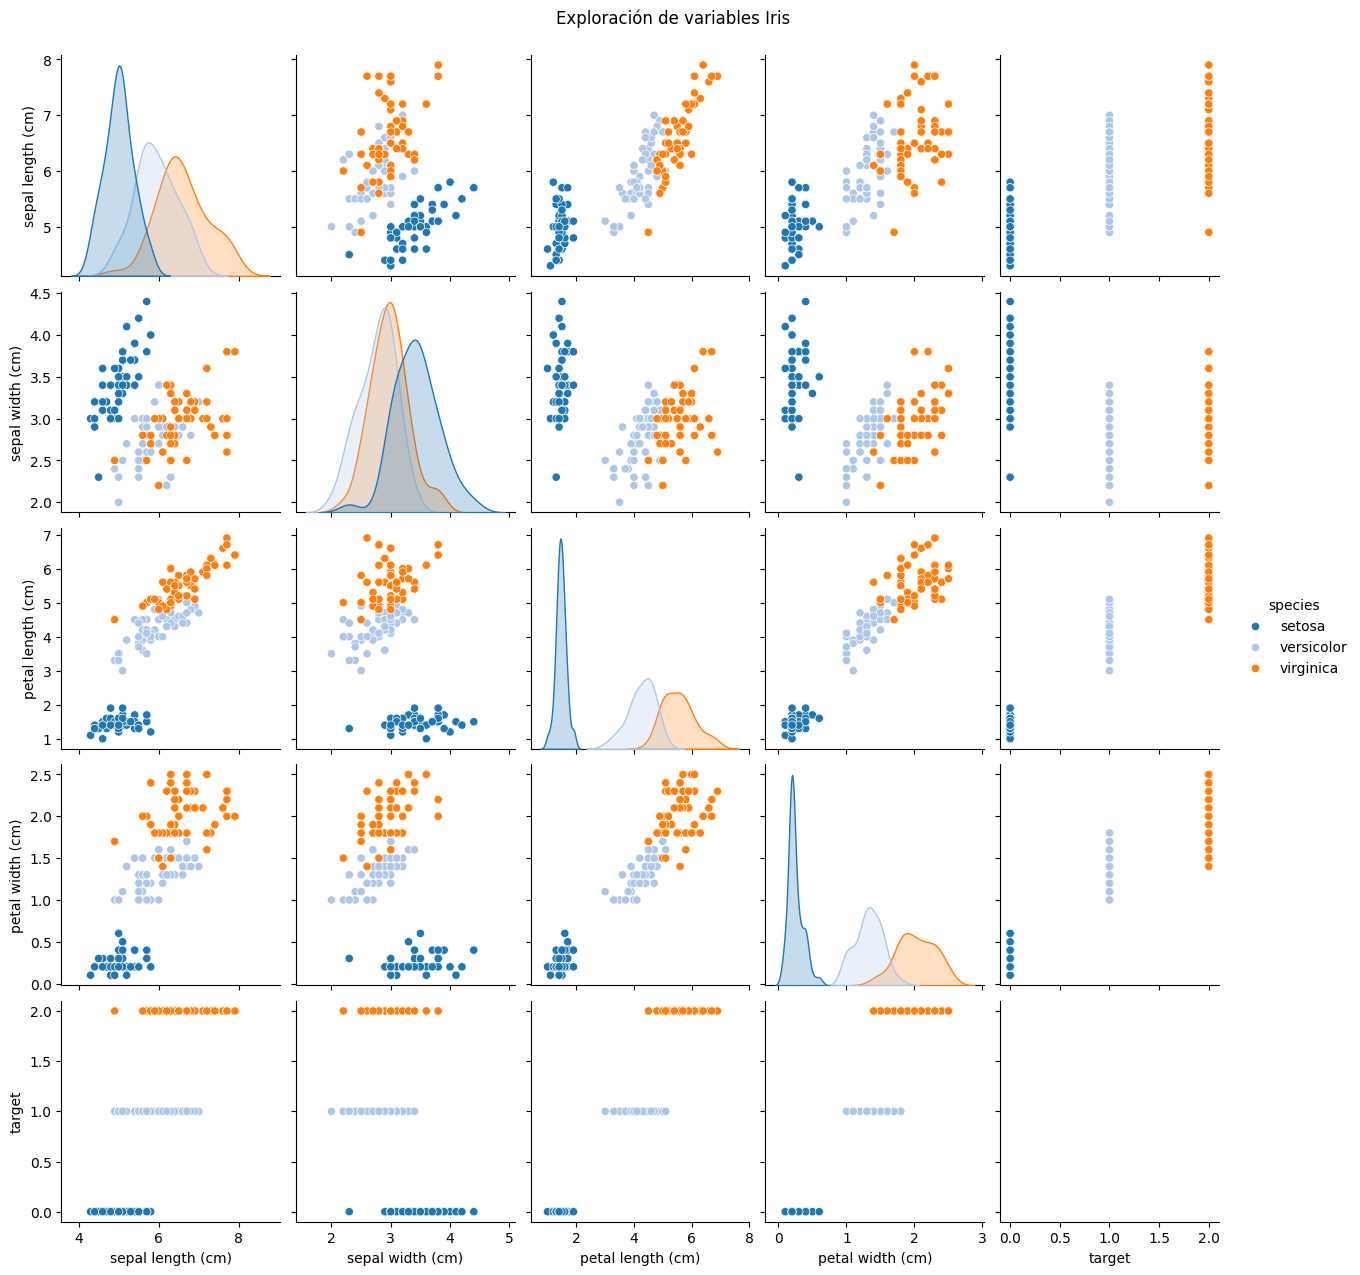

In [56]:
# Gráfico de distribución
plt.figure(figsize=(1, 1))
sns.pairplot(df, hue="species", diag_kind="kde", palette="tab20")
plt.suptitle("Exploración de variables Iris", y=1.02)
plt.show()

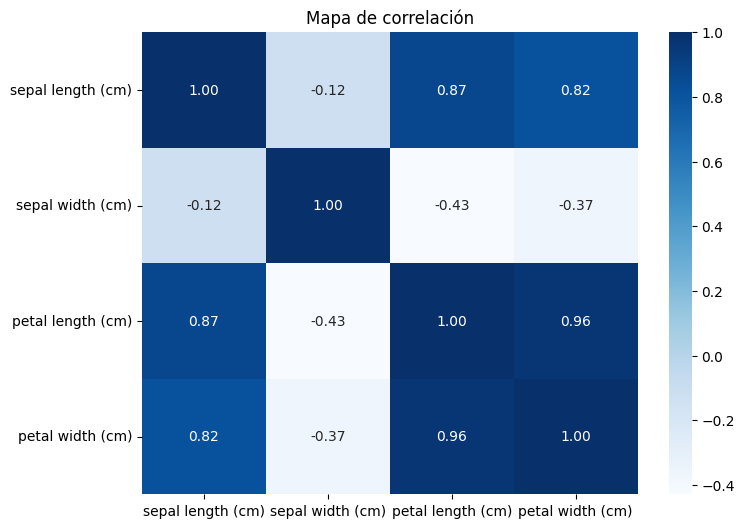

In [58]:
# Correlación
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['target', 'species']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de correlación")
plt.show()

3. Data Preparation

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target','species'])
y = df['target']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Estandarizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Modeling

In [66]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [84]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definir modelos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(max_depth=3, verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = {
        "accuracy": acc,
        "y_pred": y_pred,
        "modelo": modelo
    }
    print(f"=== {nombre} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

=== Logistic Regression ===
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== Random Forest ===
Accuracy: 0.9000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

=== XGBoost ===
Accuracy: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor

5. Evaluation

/tmp/ipython-input-3660019223.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, x="Modelo", y="Accuracy", palette="Blues")


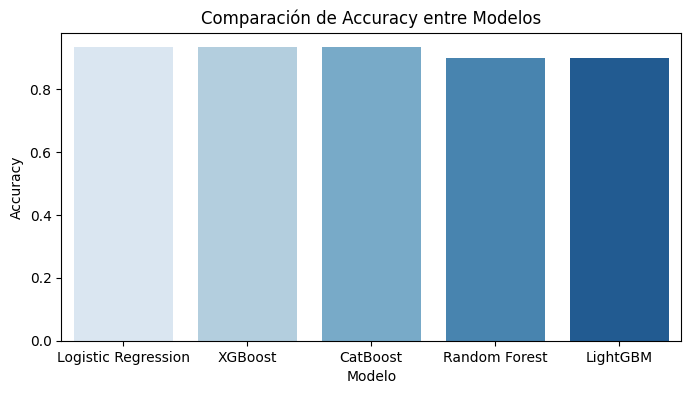

In [97]:
df_resultados = pd.DataFrame({
    "Modelo": list(resultados.keys()),
    "Accuracy": [v["accuracy"] for v in resultados.values()]
})

df_resultados = df_resultados.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=df_resultados, x="Modelo", y="Accuracy", palette="Blues")
plt.title("Comparación de Accuracy entre Modelos")
plt.show()

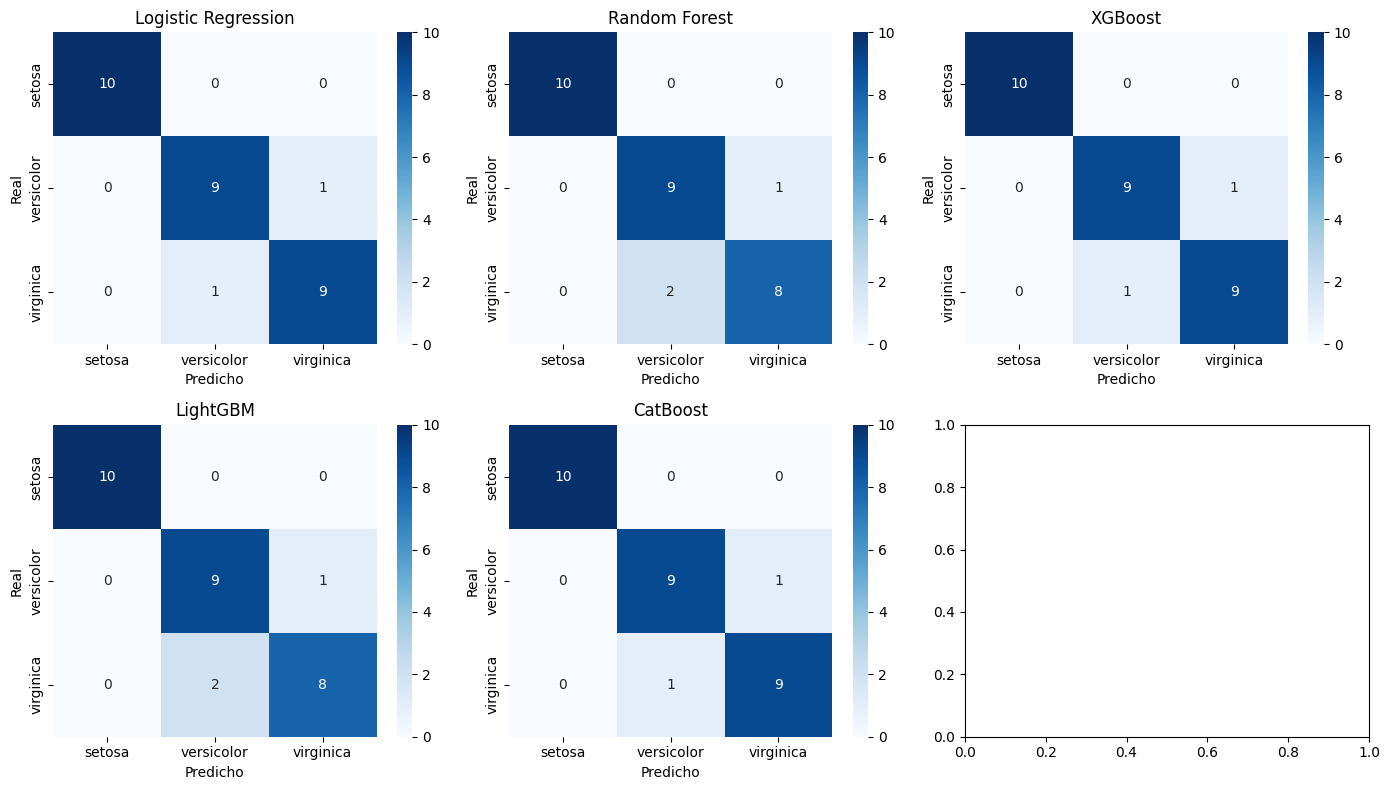

In [76]:
# Matriz de confusión para cada modelo
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.ravel()

for i, (nombre, res) in enumerate(resultados.items()):
    cm = confusion_matrix(y_test, res["y_pred"])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=iris.target_names,
                yticklabels=iris.target_names,
                ax=axes[i])
    axes[i].set_title(nombre)
    axes[i].set_xlabel("Predicho")
    axes[i].set_ylabel("Real")

plt.tight_layout()
plt.show()